In [1]:
!pip install tensorflow

In [2]:
!pip install keras

In [3]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
gas=pd.read_csv("C:\\Users\\lenovo\\Downloads\\gas_turbines.csv")
gas.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


# EDA

In [5]:
#checking null value
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


No null values

In [6]:
#checking missing value
gas[gas.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


<AxesSubplot:xlabel='AT', ylabel='Density'>

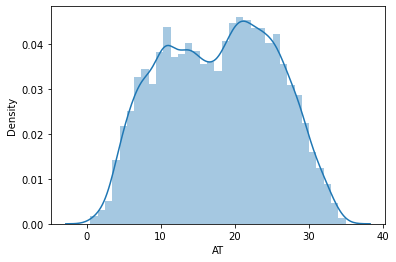

In [7]:
sns.distplot(gas['AT'])

<AxesSubplot:xlabel='AP', ylabel='Density'>

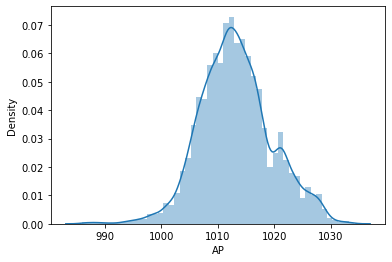

In [8]:
sns.distplot(gas['AP'])

<AxesSubplot:xlabel='AH', ylabel='Density'>

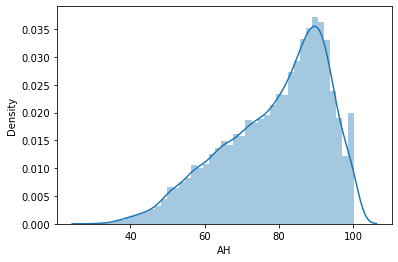

In [9]:
sns.distplot(gas['AH'])

<AxesSubplot:xlabel='GTEP', ylabel='Density'>

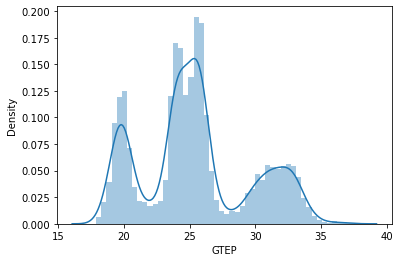

In [10]:
sns.distplot(gas['GTEP'])

<AxesSubplot:xlabel='TIT', ylabel='Density'>

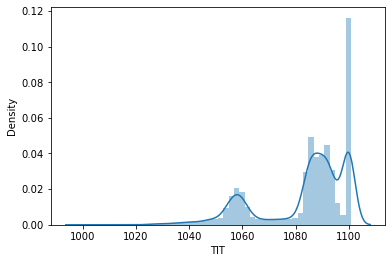

In [11]:
sns.distplot(gas['TIT'])

<AxesSubplot:xlabel='TAT', ylabel='Density'>

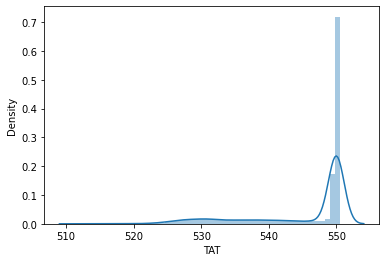

In [12]:
sns.distplot(gas['TAT'])

<AxesSubplot:xlabel='CDP', ylabel='Density'>

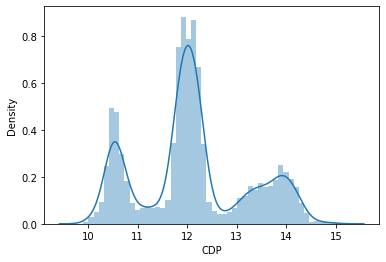

In [13]:
sns.distplot(gas['CDP'])

<AxesSubplot:xlabel='CO', ylabel='Density'>

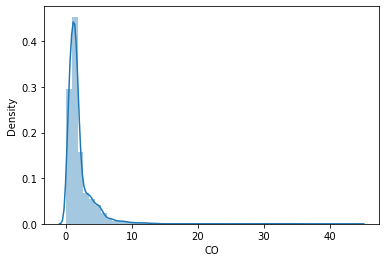

In [14]:
sns.distplot(gas['CO'])

<AxesSubplot:xlabel='NOX', ylabel='Density'>

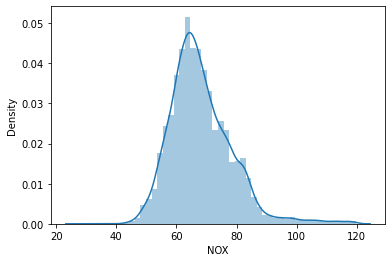

In [15]:
sns.distplot(gas['NOX'])

# Spliting dependant & independant variables

In [16]:
y=gas["TEY"]

# Take the only ambient variable as independant variables

In [17]:
 x=gas.iloc[:,:3]

In [18]:
x

,AT,AP,AH
0,6.8594,1007.9,96.799
1,6.7850,1008.4,97.118
2,6.8977,1008.8,95.939
3,7.0569,1009.2,95.249
4,7.3978,1009.7,95.150
...,...,...,...
15034,9.0301,1005.6,98.460
15035,7.8879,1005.9,99.093
15036,7.2647,1006.3,99.496
15037,7.0060,1006.8,99.008


In [19]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

# converting independant vatiables in to numpy array

In [20]:
x1=x.values

In [21]:
x1

array([[   6.8594, 1007.9   ,   96.799 ],
       [   6.785 , 1008.4   ,   97.118 ],
       [   6.8977, 1008.8   ,   95.939 ],
       ...,
       [   7.2647, 1006.3   ,   99.496 ],
       [   7.006 , 1006.8   ,   99.008 ],
       [   6.9279, 1007.2   ,   97.533 ]])

In [22]:
y1=y.values

In [23]:
y1

array([114.7 , 114.72, 114.71, ..., 110.19, 110.74, 111.58])

# Build Model

# use the mean squared error as the loss function

In [24]:
model=Sequential()
model.add(Dense(3,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation='linear'))

In [25]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [26]:
history=model.fit(x1,y1,validation_split=0.33,epochs=250,batch_size=10)

Epoch 1/250
1008/1008 [==============================] - 14s 9ms/step - loss: 570.5789 - val_loss: 238.2478
Epoch 2/250
1008/1008 [==============================] - 6s 6ms/step - loss: 239.4260 - val_loss: 233.2756
Epoch 3/250
1008/1008 [==============================] - 5s 5ms/step - loss: 235.0800 - val_loss: 233.0843
Epoch 4/250
1008/1008 [==============================] - 10s 10ms/step - loss: 231.8943 - val_loss: 236.6078
Epoch 5/250
1008/1008 [==============================] - 9s 9ms/step - loss: 229.1992 - val_loss: 232.5825
Epoch 6/250
1008/1008 [==============================] - 6s 6ms/step - loss: 228.2317 - val_loss: 228.8534
Epoch 7/250
1008/1008 [==============================] - 7s 6ms/step - loss: 226.2366 - val_loss: 228.7721
Epoch 8/250
1008/1008 [==============================] - 5s 5ms/step - loss: 226.2182 - val_loss: 230.6496
Epoch 9/250
1008/1008 [==============================] - 6s 6ms/step - loss: 225.5990 - val_loss: 227.4886
Epoch 10/250
1008/1008 [==========

Epoch 77/250
1008/1008 [==============================] - 3s 3ms/step - loss: 218.4842 - val_loss: 226.1709
Epoch 78/250
1008/1008 [==============================] - 3s 3ms/step - loss: 218.4877 - val_loss: 220.7448
Epoch 79/250
1008/1008 [==============================] - 4s 4ms/step - loss: 217.4604 - val_loss: 223.1699
Epoch 80/250
1008/1008 [==============================] - 3s 3ms/step - loss: 217.9026 - val_loss: 221.3197
Epoch 81/250
1008/1008 [==============================] - 2s 2ms/step - loss: 219.0503 - val_loss: 222.8936
Epoch 82/250
1008/1008 [==============================] - 4s 4ms/step - loss: 218.4386 - val_loss: 224.1235
Epoch 83/250
1008/1008 [==============================] - 2s 2ms/step - loss: 218.1069 - val_loss: 224.3430
Epoch 84/250
1008/1008 [==============================] - 3s 2ms/step - loss: 217.9833 - val_loss: 219.0082
Epoch 85/250
1008/1008 [==============================] - 4s 4ms/step - loss: 217.8928 - val_loss: 226.6232
Epoch 86/250
1008/1008 [====

1008/1008 [==============================] - 3s 3ms/step - loss: 217.3046 - val_loss: 218.8107
Epoch 153/250
1008/1008 [==============================] - 2s 2ms/step - loss: 217.9455 - val_loss: 220.4055
Epoch 154/250
1008/1008 [==============================] - 3s 2ms/step - loss: 217.5600 - val_loss: 223.2458
Epoch 155/250
1008/1008 [==============================] - 3s 3ms/step - loss: 217.5270 - val_loss: 222.2131
Epoch 156/250
1008/1008 [==============================] - 3s 3ms/step - loss: 217.3443 - val_loss: 219.2605
Epoch 157/250
1008/1008 [==============================] - 2s 2ms/step - loss: 217.6617 - val_loss: 219.2864
Epoch 158/250
1008/1008 [==============================] - 3s 3ms/step - loss: 217.0419 - val_loss: 222.6575
Epoch 159/250
1008/1008 [==============================] - 3s 3ms/step - loss: 217.3465 - val_loss: 223.0567
Epoch 160/250
1008/1008 [==============================] - 3s 3ms/step - loss: 217.4386 - val_loss: 230.8786
Epoch 161/250
1008/1008 [========

1008/1008 [==============================] - 2s 2ms/step - loss: 218.4215 - val_loss: 222.7970
Epoch 228/250
1008/1008 [==============================] - 3s 3ms/step - loss: 217.2319 - val_loss: 220.2795
Epoch 229/250
1008/1008 [==============================] - 3s 3ms/step - loss: 217.5876 - val_loss: 220.5136
Epoch 230/250
1008/1008 [==============================] - 3s 3ms/step - loss: 217.4921 - val_loss: 219.5137
Epoch 231/250
1008/1008 [==============================] - 3s 2ms/step - loss: 216.5948 - val_loss: 235.0270
Epoch 232/250
1008/1008 [==============================] - 3s 2ms/step - loss: 217.6889 - val_loss: 218.2222
Epoch 233/250
1008/1008 [==============================] - 2s 2ms/step - loss: 217.5221 - val_loss: 220.7874
Epoch 234/250
1008/1008 [==============================] - 3s 3ms/step - loss: 217.9782 - val_loss: 223.7402
Epoch 235/250
1008/1008 [==============================] - 3s 3ms/step - loss: 217.2854 - val_loss: 220.8078
Epoch 236/250
1008/1008 [========

In [27]:
model.evaluate(x1,y1)

470/470 [==============================] - 1s 2ms/step - loss: 216.5094


216.5093536376953

In [28]:
pred=model.predict(x1)

470/470 [==============================] - 1s 1ms/step


In [29]:
pred

array([[137.68262],
       [137.67374],
       [138.0432 ],
       ...,
       [136.80357],
       [136.9751 ],
       [137.39693]], dtype=float32)

In [30]:
history.history

{'loss': [570.5789184570312,
  239.42604064941406,
  235.08004760742188,
  231.89434814453125,
  229.19915771484375,
  228.23171997070312,
  226.2366485595703,
  226.21824645996094,
  225.59902954101562,
  226.38450622558594,
  226.0712127685547,
  225.15037536621094,
  225.6509246826172,
  225.5470428466797,
  225.0087127685547,
  224.86329650878906,
  225.37278747558594,
  225.33837890625,
  225.0169219970703,
  224.42881774902344,
  224.5626220703125,
  224.69281005859375,
  224.69708251953125,
  223.6004638671875,
  224.0362548828125,
  224.56153869628906,
  224.93017578125,
  223.6112060546875,
  223.28158569335938,
  223.34341430664062,
  223.832275390625,
  222.54466247558594,
  222.5292205810547,
  222.52890014648438,
  221.91099548339844,
  221.45849609375,
  222.69529724121094,
  221.10997009277344,
  221.28672790527344,
  220.78970336914062,
  220.231689453125,
  219.62869262695312,
  220.28622436523438,
  220.96337890625,
  220.55992126464844,
  220.1829376220703,
  219.575

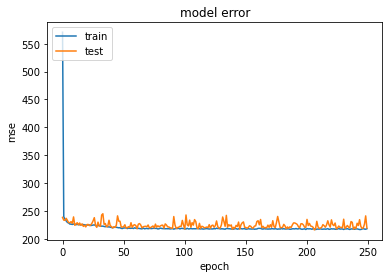

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

# Trying anather model

In [32]:
model1=Sequential()
model.add(Dense(3,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation='linear'))


In [33]:
model1.compile(loss='mean_squared_error',optimizer='adam')

In [34]:
history=model.fit(x1,y1,validation_split=0.33,epochs=250,batch_size=10)

Epoch 1/250
1008/1008 [==============================] - 3s 3ms/step - loss: 216.8715 - val_loss: 220.0078
Epoch 2/250
1008/1008 [==============================] - 3s 3ms/step - loss: 217.7506 - val_loss: 229.4730
Epoch 3/250
1008/1008 [==============================] - 3s 3ms/step - loss: 217.5947 - val_loss: 227.6759
Epoch 4/250
1008/1008 [==============================] - 3s 3ms/step - loss: 218.0219 - val_loss: 222.2956
Epoch 5/250
1008/1008 [==============================] - 3s 3ms/step - loss: 217.0042 - val_loss: 236.1611
Epoch 6/250
1008/1008 [==============================] - 3s 2ms/step - loss: 217.8925 - val_loss: 217.9210
Epoch 7/250
1008/1008 [==============================] - 3s 3ms/step - loss: 217.5099 - val_loss: 223.3221
Epoch 8/250
1008/1008 [==============================] - 3s 3ms/step - loss: 216.9220 - val_loss: 225.7983
Epoch 9/250
1008/1008 [==============================] - 3s 3ms/step - loss: 217.2181 - val_loss: 219.1948
Epoch 10/250
1008/1008 [=============

Epoch 77/250
1008/1008 [==============================] - 3s 3ms/step - loss: 216.5680 - val_loss: 220.4752
Epoch 78/250
1008/1008 [==============================] - 3s 3ms/step - loss: 217.4208 - val_loss: 233.6068
Epoch 79/250
1008/1008 [==============================] - 3s 3ms/step - loss: 217.9258 - val_loss: 220.8306
Epoch 80/250
1008/1008 [==============================] - 3s 3ms/step - loss: 216.5597 - val_loss: 226.0016
Epoch 81/250
1008/1008 [==============================] - 3s 3ms/step - loss: 217.3260 - val_loss: 221.8956
Epoch 82/250
1008/1008 [==============================] - 2s 2ms/step - loss: 217.0820 - val_loss: 225.3914
Epoch 83/250
1008/1008 [==============================] - 3s 3ms/step - loss: 217.1906 - val_loss: 226.8547
Epoch 84/250
1008/1008 [==============================] - 3s 3ms/step - loss: 217.2375 - val_loss: 219.2216
Epoch 85/250
1008/1008 [==============================] - 2s 2ms/step - loss: 217.0577 - val_loss: 219.0980
Epoch 86/250
1008/1008 [====

1008/1008 [==============================] - 3s 3ms/step - loss: 216.7249 - val_loss: 219.5228
Epoch 153/250
1008/1008 [==============================] - 3s 3ms/step - loss: 217.1827 - val_loss: 218.4268
Epoch 154/250
1008/1008 [==============================] - 3s 3ms/step - loss: 217.1930 - val_loss: 220.5779
Epoch 155/250
1008/1008 [==============================] - 3s 3ms/step - loss: 217.2477 - val_loss: 230.9184
Epoch 156/250
1008/1008 [==============================] - 3s 3ms/step - loss: 217.2546 - val_loss: 218.4613
Epoch 157/250
1008/1008 [==============================] - 2s 2ms/step - loss: 216.3212 - val_loss: 219.1496
Epoch 158/250
1008/1008 [==============================] - 3s 3ms/step - loss: 217.2185 - val_loss: 223.0838
Epoch 159/250
1008/1008 [==============================] - 3s 3ms/step - loss: 216.9364 - val_loss: 221.9319
Epoch 160/250
1008/1008 [==============================] - 3s 3ms/step - loss: 217.3435 - val_loss: 220.5139
Epoch 161/250
1008/1008 [========

1008/1008 [==============================] - 3s 3ms/step - loss: 216.5615 - val_loss: 226.8694
Epoch 228/250
1008/1008 [==============================] - 3s 3ms/step - loss: 217.5703 - val_loss: 226.2684
Epoch 229/250
1008/1008 [==============================] - 3s 3ms/step - loss: 216.8432 - val_loss: 219.0688
Epoch 230/250
1008/1008 [==============================] - 3s 3ms/step - loss: 217.8806 - val_loss: 220.2051
Epoch 231/250
1008/1008 [==============================] - 3s 3ms/step - loss: 217.1904 - val_loss: 220.1521
Epoch 232/250
1008/1008 [==============================] - 3s 3ms/step - loss: 217.2074 - val_loss: 219.4350
Epoch 233/250
1008/1008 [==============================] - 3s 3ms/step - loss: 216.9681 - val_loss: 217.9464
Epoch 234/250
1008/1008 [==============================] - 3s 3ms/step - loss: 217.0529 - val_loss: 217.4143
Epoch 235/250
1008/1008 [==============================] - 3s 3ms/step - loss: 216.6158 - val_loss: 222.2159
Epoch 236/250
1008/1008 [========

In [35]:
model1.evaluate(x1,y1)

470/470 [==============================] - 1s 1ms/step - loss: 263451.7188


263451.71875

this model gives a significantly worse error

# Adding the additional hidden layer to the model

In [36]:
model2=Sequential()
model2.add(Dense(3,activation='relu'))
model2.add(Dense(3,activation='relu'))
model2.add(Dense(3,activation='relu'))
model2.add(Dense(1,activation='linear'))

In [37]:
model2.compile(loss='mean_squared_error',optimizer='adam')

In [38]:
history=model2.fit(x1,y1,validation_split=0.33,epochs=250,batch_size=10)

Epoch 1/250
1008/1008 [==============================] - 4s 3ms/step - loss: 11039.6592 - val_loss: 263.7354
Epoch 2/250
1008/1008 [==============================] - 3s 3ms/step - loss: 261.1588 - val_loss: 262.7300
Epoch 3/250
1008/1008 [==============================] - 3s 3ms/step - loss: 260.2826 - val_loss: 254.2177
Epoch 4/250
1008/1008 [==============================] - 3s 3ms/step - loss: 258.3144 - val_loss: 255.9382
Epoch 5/250
1008/1008 [==============================] - 3s 3ms/step - loss: 257.0769 - val_loss: 264.5192
Epoch 6/250
1008/1008 [==============================] - 3s 3ms/step - loss: 255.6420 - val_loss: 267.1978
Epoch 7/250
1008/1008 [==============================] - 3s 3ms/step - loss: 253.8284 - val_loss: 256.2357
Epoch 8/250
1008/1008 [==============================] - 3s 3ms/step - loss: 252.4190 - val_loss: 253.5231
Epoch 9/250
1008/1008 [==============================] - 3s 3ms/step - loss: 250.4109 - val_loss: 243.9671
Epoch 10/250
1008/1008 [===========

Epoch 77/250
1008/1008 [==============================] - 3s 3ms/step - loss: 225.2101 - val_loss: 231.5940
Epoch 78/250
1008/1008 [==============================] - 3s 3ms/step - loss: 225.5728 - val_loss: 223.8662
Epoch 79/250
1008/1008 [==============================] - 3s 3ms/step - loss: 225.5540 - val_loss: 228.1340
Epoch 80/250
1008/1008 [==============================] - 3s 3ms/step - loss: 224.9539 - val_loss: 224.0940
Epoch 81/250
1008/1008 [==============================] - 3s 3ms/step - loss: 224.5272 - val_loss: 223.4840
Epoch 82/250
1008/1008 [==============================] - 3s 3ms/step - loss: 224.8392 - val_loss: 225.7855
Epoch 83/250
1008/1008 [==============================] - 3s 3ms/step - loss: 224.9621 - val_loss: 228.6500
Epoch 84/250
1008/1008 [==============================] - 3s 3ms/step - loss: 224.7171 - val_loss: 224.6015
Epoch 85/250
1008/1008 [==============================] - 3s 3ms/step - loss: 225.5513 - val_loss: 228.5981
Epoch 86/250
1008/1008 [====

1008/1008 [==============================] - 3s 3ms/step - loss: 224.4750 - val_loss: 226.0043
Epoch 153/250
1008/1008 [==============================] - 3s 3ms/step - loss: 224.4146 - val_loss: 227.1434
Epoch 154/250
1008/1008 [==============================] - 3s 3ms/step - loss: 224.4387 - val_loss: 243.2064
Epoch 155/250
1008/1008 [==============================] - 3s 3ms/step - loss: 224.8262 - val_loss: 224.2212
Epoch 156/250
1008/1008 [==============================] - 3s 3ms/step - loss: 225.0462 - val_loss: 224.6183
Epoch 157/250
1008/1008 [==============================] - 2s 2ms/step - loss: 224.9109 - val_loss: 224.5830
Epoch 158/250
1008/1008 [==============================] - 2s 2ms/step - loss: 224.3497 - val_loss: 223.8877
Epoch 159/250
1008/1008 [==============================] - 4s 4ms/step - loss: 224.8629 - val_loss: 225.8489
Epoch 160/250
1008/1008 [==============================] - 3s 3ms/step - loss: 225.4747 - val_loss: 223.3208
Epoch 161/250
1008/1008 [========

1008/1008 [==============================] - 2s 2ms/step - loss: 225.3825 - val_loss: 224.1810
Epoch 228/250
1008/1008 [==============================] - 4s 4ms/step - loss: 224.7428 - val_loss: 223.5349
Epoch 229/250
1008/1008 [==============================] - 4s 4ms/step - loss: 224.8894 - val_loss: 223.4065
Epoch 230/250
1008/1008 [==============================] - 3s 3ms/step - loss: 224.7368 - val_loss: 224.1104
Epoch 231/250
1008/1008 [==============================] - 3s 2ms/step - loss: 224.8445 - val_loss: 228.3589
Epoch 232/250
1008/1008 [==============================] - 3s 2ms/step - loss: 225.0387 - val_loss: 223.2721
Epoch 233/250
1008/1008 [==============================] - 2s 2ms/step - loss: 225.1106 - val_loss: 223.5311
Epoch 234/250
1008/1008 [==============================] - 2s 2ms/step - loss: 224.8131 - val_loss: 225.9058
Epoch 235/250
1008/1008 [==============================] - 4s 4ms/step - loss: 225.4583 - val_loss: 225.8153
Epoch 236/250
1008/1008 [========

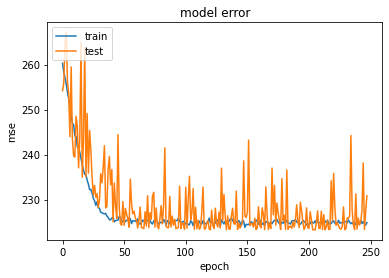

In [39]:
plt.plot(history.history['loss'][2:])
plt.plot(history.history['val_loss'][2:])
plt.title('model error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [40]:
model_final=model